# Relacion PCA y Autoencoder
La practica se desarrollará sobre la base de datos MNIST

In [42]:
from sklearn import decomposition
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras import backend as K
import itertools
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.backend import clear_session
%matplotlib inline
mnist = pd.read_csv("data/mnist1.5k.csv.gz", compression="gzip", header=None).values
X=mnist[:,1:785]/255.
y=mnist[:,0]
X_train, X_test, y_train, y_test = X[:300], X[300:], y[:300], y[300:]
y_train_oh = np.eye(10)[y_train]
y_test_oh  = np.eye(10)[y_test]

In [43]:
print ("dimension de las imagenes y las clases", X.shape, y.shape)
print ("dimension del dataset, train:", X_train.shape, y_train_oh.shape,'test:',  X_test.shape, y_test_oh.shape)

dimension de las imagenes y las clases (1500, 784) (1500,)
dimension del dataset, train: (300, 784) (300, 10) test: (1200, 784) (1200, 10)


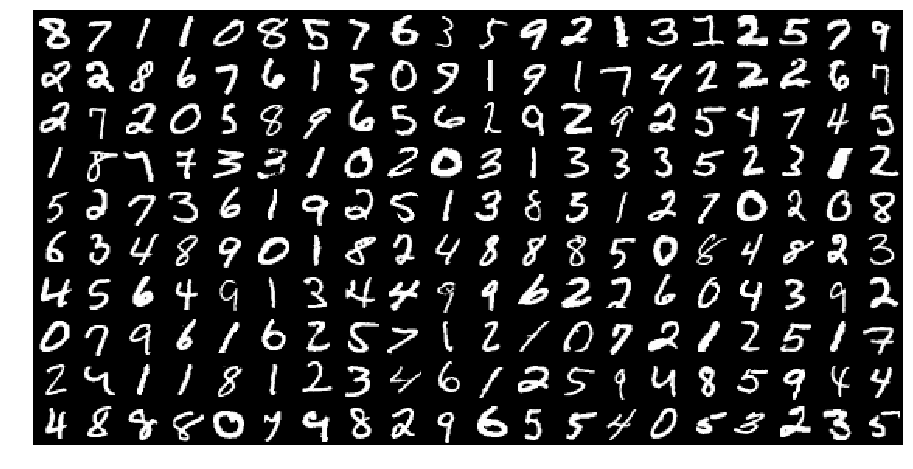

In [44]:
def show_linearized_images_sample(X, n_images=200, permutation=True):
    plt.figure(figsize=(18,8))
    Xp = np.random.permutation(X) if permutation else X
    img =  np.rollaxis(np.rollaxis(Xp[:n_images].reshape(20, -1, 28, 28), 0, 2), 1, 3).reshape(-1, 20 * 28)
    plt.imshow(img, cmap=plt.cm.Greys_r)
    plt.axis("off")
show_linearized_images_sample(X)


## Se haran 3 experimentos: una capa oculta, mas capas, y variaciones en las funciones de activacion.


### 1. Una capa oculta, funcion de activacion linear.
#### En teorio el encoder es analogo al PCA al usar una capa oculta, funciones de activaciones lineal, y funciones de costo de error cuadratico, ya que el PCA tambien esta basado en el error cuadratico.

In [45]:
def get_model_B(input_dim, code_size):
    model= Sequential()
    model.add(Dense(code_size, activation='linear', input_dim=input_dim))
    model.add(Dense(input_dim, activation='linear'))    
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.reset_states()    
    return model

In [46]:
model = get_model_B(input_dim=X.shape[1], code_size=24)
model.fit(X_train, X_train, epochs=100, batch_size=32)
#Se define el metodo para extraer los componentes principales con una dimension de 24 componentes al igual que la dimension 
#de la capa oculta del ENCODER
pca = decomposition.PCA(n_components=24)
pca.fit(X_train)
X1 = pca.transform(X_test)

Epoch 1/100
300/300 [==============================] - 0s 440us/sample - loss: 0.1127
Epoch 2/100
300/300 [==============================] - 0s 46us/sample - loss: 0.0900
Epoch 3/100
300/300 [==============================] - 0s 40us/sample - loss: 0.0716
Epoch 4/100
300/300 [==============================] - 0s 43us/sample - loss: 0.0647
Epoch 5/100
300/300 [==============================] - 0s 42us/sample - loss: 0.0620
Epoch 6/100
300/300 [==============================] - 0s 44us/sample - loss: 0.0593
Epoch 7/100
300/300 [==============================] - 0s 43us/sample - loss: 0.0563
Epoch 8/100
300/300 [==============================] - 0s 32us/sample - loss: 0.0532
Epoch 9/100
300/300 [==============================] - 0s 33us/sample - loss: 0.0502
Epoch 10/100
300/300 [==============================] - 0s 40us/sample - loss: 0.0474
Epoch 11/100
300/300 [==============================] - 0s 40us/sample - loss: 0.0450
Epoch 12/100
300/300 [==============================] - 0s 42u

300/300 [==============================] - 0s 31us/sample - loss: 0.0195
Epoch 97/100
300/300 [==============================] - 0s 34us/sample - loss: 0.0195
Epoch 98/100
300/300 [==============================] - 0s 33us/sample - loss: 0.0195
Epoch 99/100
300/300 [==============================] - 0s 33us/sample - loss: 0.0195
Epoch 100/100
300/300 [==============================] - 0s 32us/sample - loss: 0.0195


In [47]:
print("Dimension despues de aplciar PCA: ", X1.shape,"Antes:",X_train.shape)

Dimension despues de aplciar PCA:  (1200, 24) Antes: (300, 784)


Text(0.5,1,'Encoder')

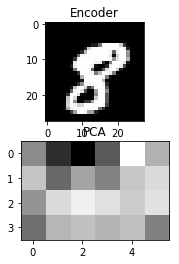

In [48]:
plt.subplot(2,1,2)
plt.title('PCA')
plt.imshow(X1[10,:].reshape(4,-1), interpolation="nearest", cmap = plt.cm.Greys_r)
plt.subplot(2,1,1)
plt.imshow(X[10,:].reshape(28,28), interpolation="nearest", cmap = plt.cm.Greys_r)
plt.title('Encoder')


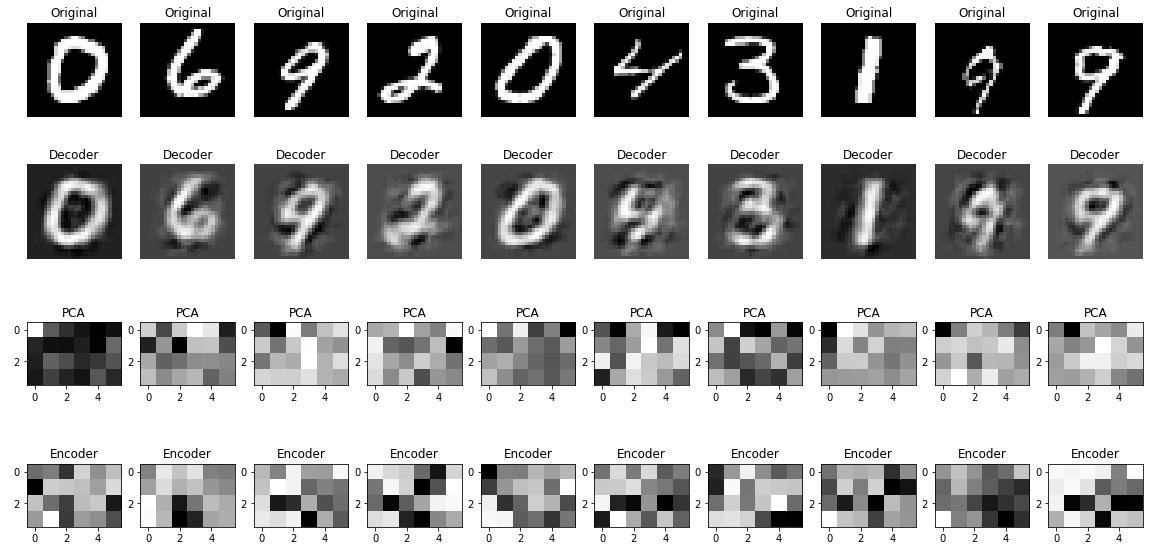

In [49]:
plt.figure(figsize=(20,10))
X_sample = np.random.permutation(X_test)[:10]
X_pred   = model.predict(X_sample)
l1_output = K.function([model.input, K.learning_phase()], [model.layers[0].output])
X_sample_encoded = l1_output([X_sample,1.])[0]
X_sample_pca=pca.transform(X_sample)
for i in range(len(X_sample)):
    plt.subplot(4,len(X_sample),i+1)
    plt.title('Original')
    plt.imshow(X_sample[i].reshape(28,28), cmap=plt.cm.Greys_r)
    plt.axis("off")
    plt.subplot(4,len(X_sample),len(X_sample)+i+1)
    plt.title('Decoder')
    plt.imshow(X_pred[i].reshape(28,28), cmap=plt.cm.Greys_r)
    plt.axis("off")
    plt.subplot(4,len(X_sample),len(X_sample)*2+i+1)    
    plt.title('PCA')
    plt.imshow(X_sample_pca[i].reshape(4,-1), cmap=plt.cm.Greys_r)    
    plt.subplot(4,len(X_sample),len(X_sample)*3+i+1)
    plt.title('Encoder')
    plt.imshow(X_sample_encoded[i].reshape(4,-1), cmap=plt.cm.Greys_r)
    
    

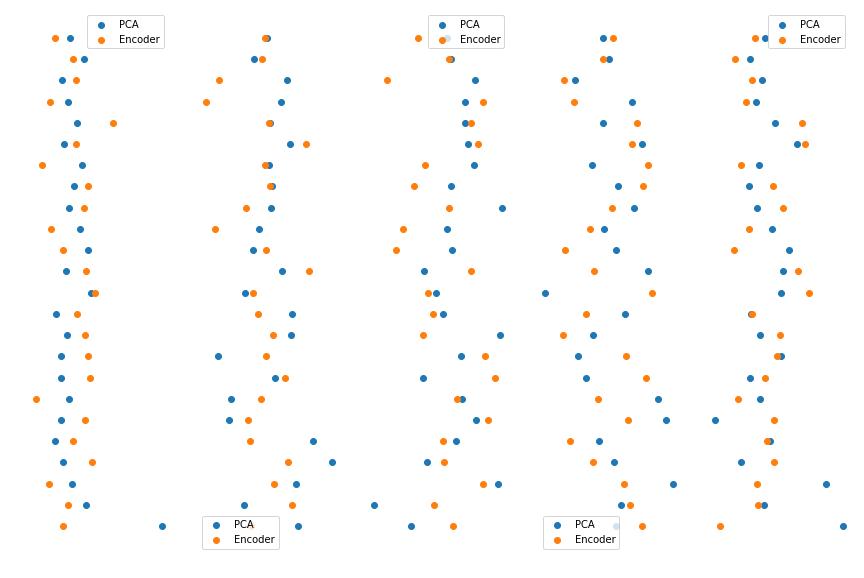

In [50]:
plt.figure(figsize=(30,10))
for i in range(5):
    plt.subplot(1,len(X_sample),i+1)
   
    plt.scatter(X_sample_pca[i],np.arange(len(X_sample_pca[i])),label='PCA')
    

    
    plt.scatter(X_sample_encoded[i],np.arange(len(X_sample_encoded[i])),label='Encoder')
    plt.legend()
    plt.axis("off")

##### podemos observar cierta relacion entre la distribucion de los componentes de los dos metodos

### 2. Más capas ocultas con funcion de activacion linear

In [51]:

def get_model_A(input_dim, hidden_size, code_size):
    clear_session()
    model = Sequential()
    model.add(Dense(hidden_size, activation='linear', input_dim=input_dim))
    model.add(Dense(code_size, activation='linear'))
    model.add(Dense(hidden_size, activation='linear'))
    model.add(Dense(input_dim, activation='linear'))

    model.compile(optimizer='adam', loss='mean_squared_error')
    model.reset_states()
    return model


In [52]:
del model
model = get_model_A(input_dim=X.shape[1],hidden_size=256 ,code_size=24)
model.fit(X_train, X_train, epochs=100, batch_size=32)

Epoch 1/100
300/300 [==============================] - 0s 653us/sample - loss: 0.1020
Epoch 2/100
300/300 [==============================] - 0s 155us/sample - loss: 0.0659
Epoch 3/100
300/300 [==============================] - 0s 157us/sample - loss: 0.0549
Epoch 4/100
300/300 [==============================] - 0s 147us/sample - loss: 0.0453
Epoch 5/100
300/300 [==============================] - 0s 151us/sample - loss: 0.0390
Epoch 6/100
300/300 [==============================] - 0s 150us/sample - loss: 0.0346
Epoch 7/100
300/300 [==============================] - 0s 147us/sample - loss: 0.0314
Epoch 8/100
300/300 [==============================] - 0s 155us/sample - loss: 0.0292
Epoch 9/100
300/300 [==============================] - 0s 141us/sample - loss: 0.0275
Epoch 10/100
300/300 [==============================] - 0s 139us/sample - loss: 0.0262
Epoch 11/100
300/300 [==============================] - 0s 140us/sample - loss: 0.0251
Epoch 12/100
300/300 [==============================

300/300 [==============================] - 0s 139us/sample - loss: 0.0196
Epoch 96/100
300/300 [==============================] - 0s 130us/sample - loss: 0.0197
Epoch 97/100
300/300 [==============================] - 0s 133us/sample - loss: 0.0196
Epoch 98/100
300/300 [==============================] - 0s 126us/sample - loss: 0.0196
Epoch 99/100
300/300 [==============================] - 0s 127us/sample - loss: 0.0197
Epoch 100/100
300/300 [==============================] - 0s 128us/sample - loss: 0.0197


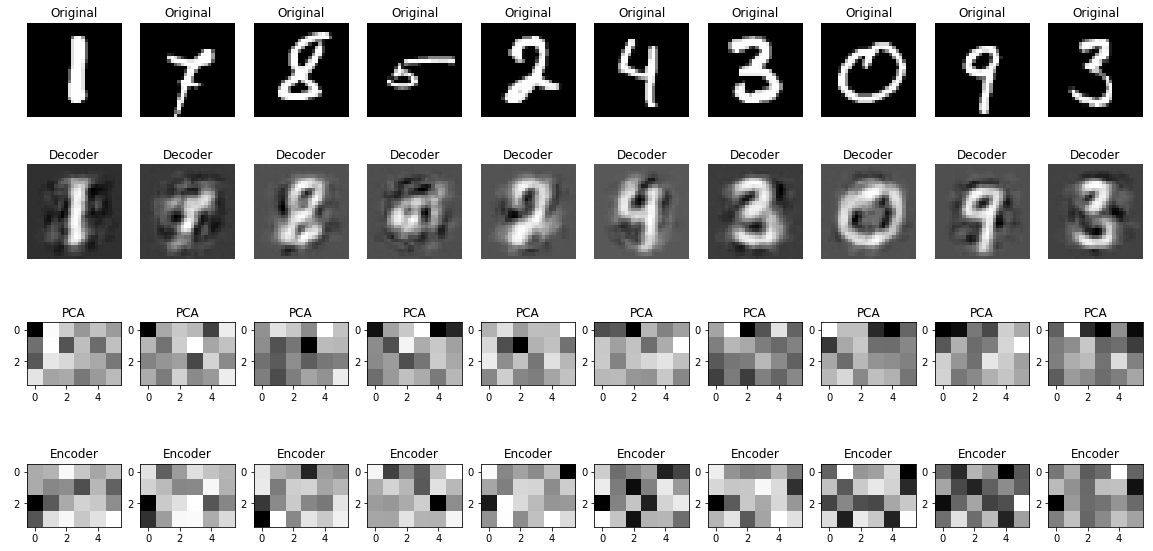

In [53]:
plt.figure(figsize=(20,10))
X_sample = np.random.permutation(X_test)[:10]
X_pred   = model.predict(X_sample)
l1_output = K.function([model.input, K.learning_phase()], [model.layers[1].output])
X_sample_encoded = l1_output([X_sample,1.])[0]
X_sample_pca=pca.transform(X_sample)
for i in range(len(X_sample)):
    plt.subplot(4,len(X_sample),i+1)
    plt.title('Original')
    plt.imshow(X_sample[i].reshape(28,28), cmap=plt.cm.Greys_r)
    plt.axis("off")
    plt.subplot(4,len(X_sample),len(X_sample)+i+1)
    plt.title('Decoder')
    plt.imshow(X_pred[i].reshape(28,28), cmap=plt.cm.Greys_r)
    plt.axis("off")
    plt.subplot(4,len(X_sample),len(X_sample)*2+i+1)    
    plt.title('PCA')
    plt.imshow(X_sample_pca[i].reshape(4,-1), cmap=plt.cm.Greys_r)    
    plt.subplot(4,len(X_sample),len(X_sample)*3+i+1)
    plt.title('Encoder')
    plt.imshow(X_sample_encoded[i].reshape(4,-1), cmap=plt.cm.Greys_r)

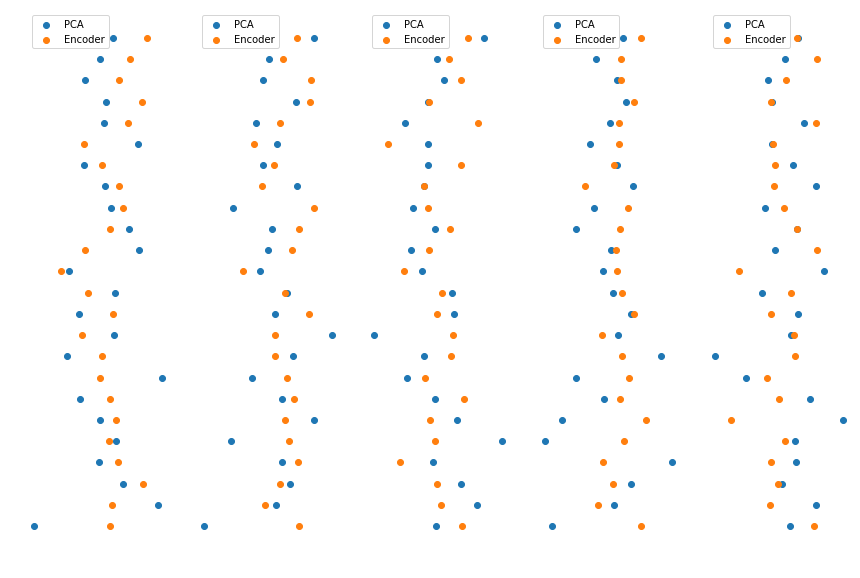

In [54]:
plt.figure(figsize=(30,10))
for i in range(5):
    plt.subplot(1,len(X_sample),i+1)
   
    plt.scatter(X_sample_pca[i],np.arange(len(X_sample_pca[i])),label='PCA')
    

    
    plt.scatter(X_sample_encoded[i],np.arange(len(X_sample_encoded[i])),label='Encoder')
    plt.legend()
    plt.axis("off")

#### se sigue conservando cierta distribucion 

 ### 3. Funcion de activacion ReLu y Sigmoid

In [55]:

def get_model_C(input_dim, hidden_size, code_size):
    clear_session()
    model = Sequential()
    model.add(Dense(hidden_size, activation='relu', input_dim=input_dim))
    model.add(Dense(code_size, activation='relu'))
    model.add(Dense(hidden_size, activation='relu'))
    model.add(Dense(input_dim, activation='sigmoid'))

    model.compile(optimizer='adam', loss='mean_squared_error')
    model.reset_states()
    return model
del model
model = get_model_C(input_dim=X.shape[1],hidden_size=256 ,code_size=24)
model.fit(X_train, X_train, epochs=100, batch_size=32)


Epoch 1/100
300/300 [==============================] - 0s 708us/sample - loss: 0.1981
Epoch 2/100
300/300 [==============================] - 0s 151us/sample - loss: 0.0877
Epoch 3/100
300/300 [==============================] - 0s 139us/sample - loss: 0.0753
Epoch 4/100
300/300 [==============================] - 0s 152us/sample - loss: 0.0727
Epoch 5/100
300/300 [==============================] - 0s 161us/sample - loss: 0.0691
Epoch 6/100
300/300 [==============================] - 0s 147us/sample - loss: 0.0642
Epoch 7/100
300/300 [==============================] - 0s 144us/sample - loss: 0.0602
Epoch 8/100
300/300 [==============================] - 0s 149us/sample - loss: 0.0568
Epoch 9/100
300/300 [==============================] - 0s 152us/sample - loss: 0.0538
Epoch 10/100
300/300 [==============================] - 0s 138us/sample - loss: 0.0509
Epoch 11/100
300/300 [==============================] - 0s 141us/sample - loss: 0.0483
Epoch 12/100
300/300 [==============================

300/300 [==============================] - 0s 127us/sample - loss: 0.0070
Epoch 96/100
300/300 [==============================] - 0s 136us/sample - loss: 0.0070
Epoch 97/100
300/300 [==============================] - 0s 130us/sample - loss: 0.0069
Epoch 98/100
300/300 [==============================] - 0s 130us/sample - loss: 0.0067
Epoch 99/100
300/300 [==============================] - 0s 123us/sample - loss: 0.0067
Epoch 100/100
300/300 [==============================] - 0s 127us/sample - loss: 0.0066


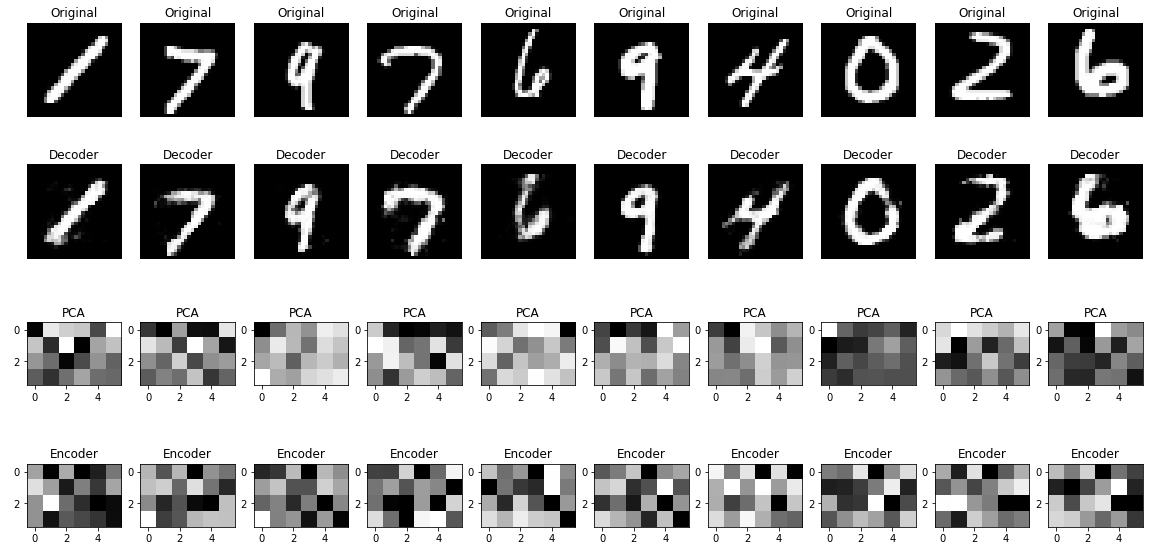

In [56]:

plt.figure(figsize=(20,10))
X_sample = np.random.permutation(X_test)[:10]
X_pred   = model.predict(X_sample)
l1_output = K.function([model.input, K.learning_phase()], [model.layers[1].output])
X_sample_encoded = l1_output([X_sample,1.])[0]
X_sample_pca=pca.transform(X_sample)
for i in range(len(X_sample)):
    plt.subplot(4,len(X_sample),i+1)
    plt.title('Original')
    plt.imshow(X_sample[i].reshape(28,28), cmap=plt.cm.Greys_r)
    plt.axis("off")
    plt.subplot(4,len(X_sample),len(X_sample)+i+1)
    plt.title('Decoder')
    plt.imshow(X_pred[i].reshape(28,28), cmap=plt.cm.Greys_r)
    plt.axis("off")
    plt.subplot(4,len(X_sample),len(X_sample)*2+i+1)    
    plt.title('PCA')
    plt.imshow(X_sample_pca[i].reshape(4,-1), cmap=plt.cm.Greys_r)    
    plt.subplot(4,len(X_sample),len(X_sample)*3+i+1)
    plt.title('Encoder')
    plt.imshow(X_sample_encoded[i].reshape(4,-1), cmap=plt.cm.Greys_r)

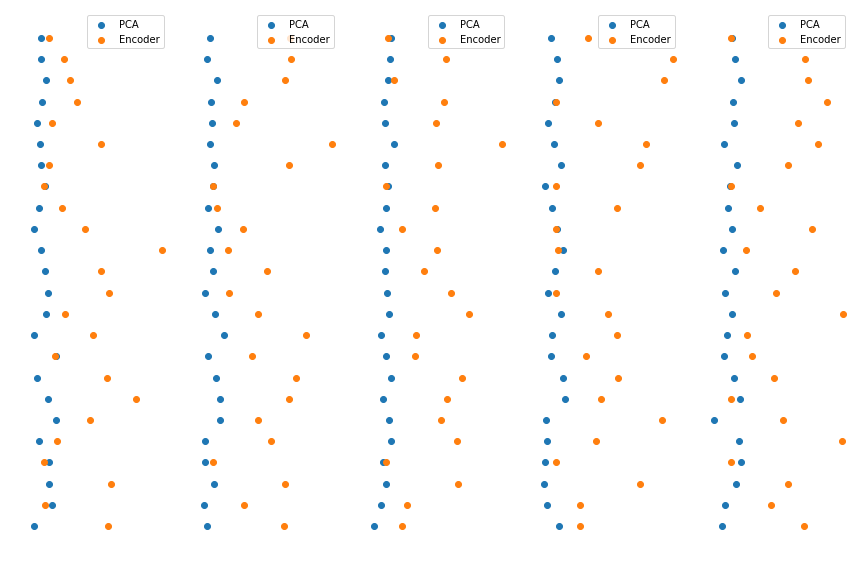

In [57]:
plt.figure(figsize=(30,10))
for i in range(5):
    plt.subplot(1,len(X_sample),i+1)
   
    plt.scatter(X_sample_pca[i],np.arange(len(X_sample_pca[i])),label='PCA')
    

    
    plt.scatter(X_sample_encoded[i],np.arange(len(X_sample_encoded[i])),label='Encoder')
    plt.legend()
    plt.axis("off")

#### La distribucion es muy diferentes ahora comparado cuando se usaron funciones lineares.